# RICE LEAF DISEASES -- CNN

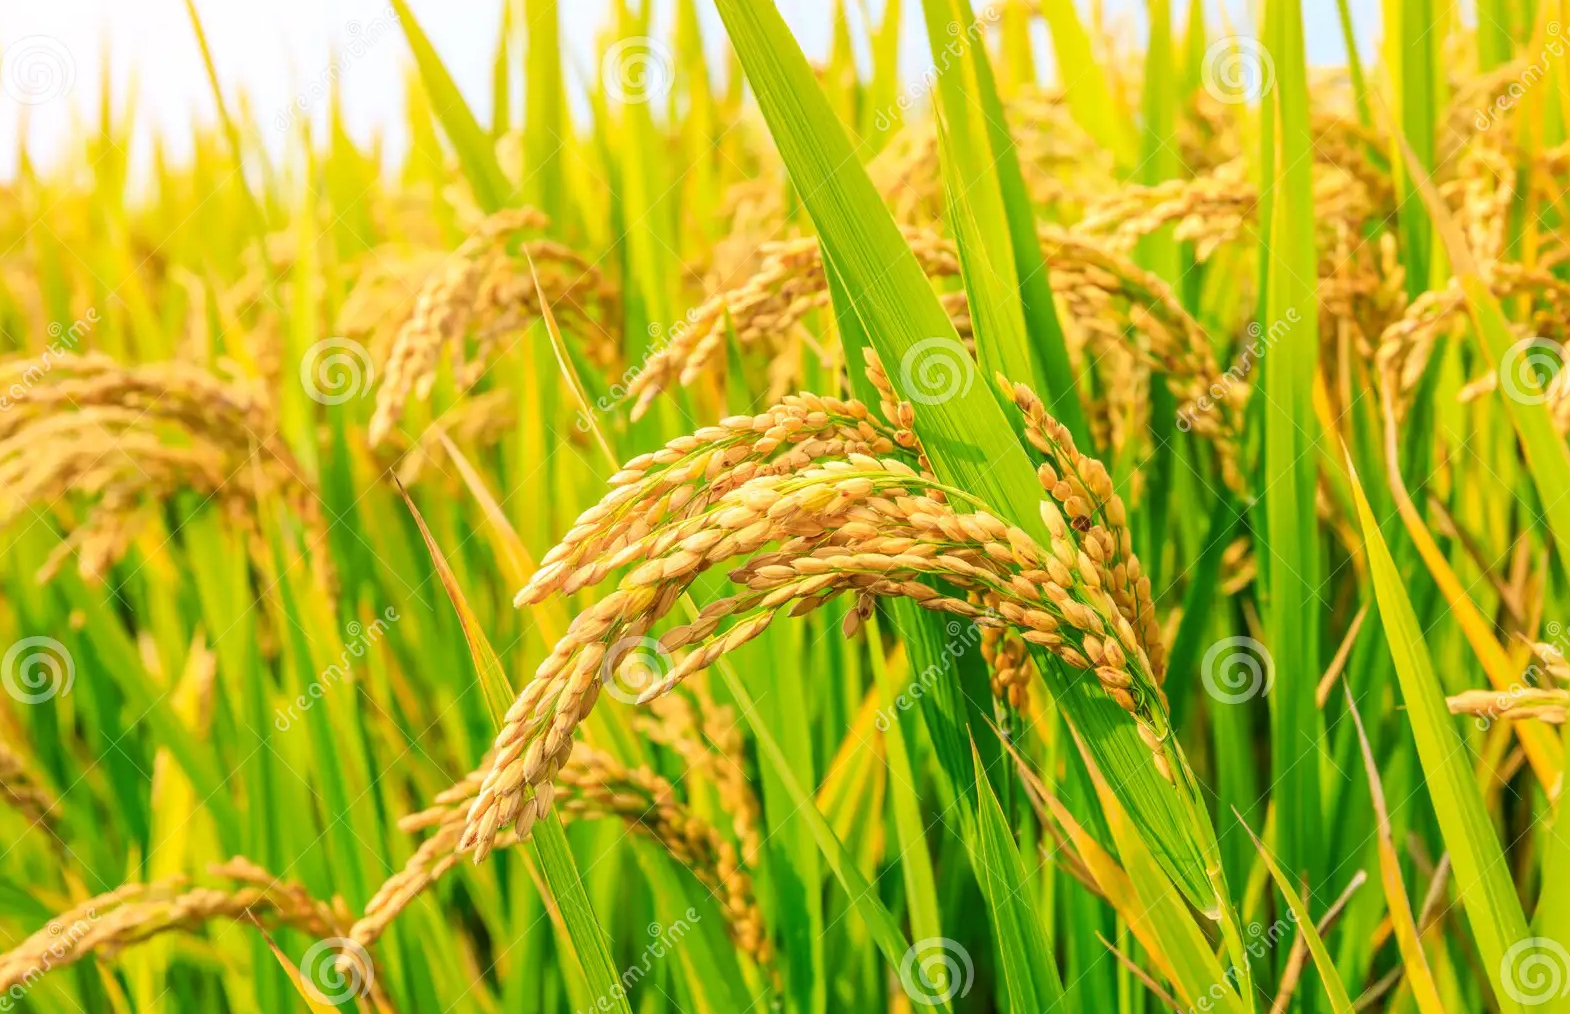

#### 1. Purpose
Objective: To identify and classify various diseases affecting rice plants based on images of rice leaves. This can help in early detection and management of plant diseases.
#### 2. Typical Content
Images: The dataset usually contains images of rice leaves with various disease symptoms. Each image is typically labeled with the type of disease or a classification category.
Labels: Images are labeled with the type of disease (e.g., bacterial leaf blight, leaf spot, blast) or might be classified into categories like healthy or diseased.
#### 3. Dataset Structure
Folders: Images are often organized into folders, each corresponding to a different disease or condition. For example, you might have folders named "Healthy," "Blast," "Bacterial Leaf Blight," etc.
Image Formats: Images are usually in standard formats such as JPEG or PNG.
Annotations: Some datasets might include annotations or metadata files that provide additional details about each image, such as the specific type of disease, severity, or image acquisition conditions.

## Import the Necessary libraries


In [2]:
import os
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Conv2D,MaxPooling2D,Dropout

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
## import the our folder pathway and create the empty folder pathways

source_dir=r'C:\Project\Rice Leaf--folders'
output_dir=r'C:\Project\splite'

## empyty folder la inside to create the 3 folders are train folder,validation folder,test folder

train_dir=os.path.join(output_dir,'train')
validation_dir=os.path.join(output_dir,'validation')
test_dir=os.path.join(output_dir,'test')

def create_directories(base_path, class_names):
    for class_name in class_names:
        for folder in [train_dir, validation_dir, test_dir]:
            os.makedirs(os.path.join(folder, class_name), exist_ok=True)

classes = [d for d in os.listdir(source_dir) if os.path.isdir(os.path.join(source_dir, d))]

# Create necessary directories
create_directories(source_dir, classes)

for class_name in classes:
    class_path = os.path.join(source_dir, class_name)
    
    if not os.path.isdir(class_path):
        print(f"Skipping {class_path} as it is not a directory.")
        continue

    images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    
    if not images:
        print(f"No images found in {class_path}.")
        continue

    # Split images into train, validation, and test sets
    train_images, temp_images = train_test_split(images, test_size=0.2, random_state=42)
    validation_images, test_images = train_test_split(temp_images, test_size=0.2, random_state=42)

    # Move images to their respective directories
    for img in train_images:
        src_img_path = os.path.join(class_path, img)
        dst_img_path = os.path.join(train_dir, class_name, img)
        try:
            shutil.copy(src_img_path, dst_img_path)  
            print(f"Copy {img} to {train_dir}/{class_name}/")
        except Exception as e:
            print(f"Error moving {img}: {e}")

    for img in validation_images:
        src_img_path = os.path.join(class_path, img)
        dst_img_path = os.path.join(validation_dir, class_name, img)
        try:
            shutil.copy(src_img_path, dst_img_path)
            print(f"Copy {img} to {validation_dir}/{class_name}/")
        except Exception as e:
            print(f"Error moving {img}: {e}")

    for img in test_images:
        src_img_path = os.path.join(class_path, img)
        dst_img_path = os.path.join(test_dir, class_name, img)
        try:
            shutil.copy(src_img_path, dst_img_path)
            print(f"Copy {img} to {test_dir}/{class_name}/")
        except Exception as e:
            print(f"Error moving {img}: {e}")

print("Image splitting complete.")

Copy DSC_0703.JPG to C:\Project\splite\train/Bacterial leaf blight/
Copy DSC_0374.JPG to C:\Project\splite\train/Bacterial leaf blight/
Copy DSC_0396.JPG to C:\Project\splite\train/Bacterial leaf blight/
Copy DSC_0377.JPG to C:\Project\splite\train/Bacterial leaf blight/
Copy DSC_0381.JPG to C:\Project\splite\train/Bacterial leaf blight/
Copy DSC_0402.JPG to C:\Project\splite\train/Bacterial leaf blight/
Copy DSC_0405.JPG to C:\Project\splite\train/Bacterial leaf blight/
Copy DSC_0376.JPG to C:\Project\splite\train/Bacterial leaf blight/
Copy DSC_0385.jpg to C:\Project\splite\train/Bacterial leaf blight/
Copy DSC_0395.JPG to C:\Project\splite\train/Bacterial leaf blight/
Copy DSC_0365.JPG to C:\Project\splite\train/Bacterial leaf blight/
Copy DSC_0404.JPG to C:\Project\splite\train/Bacterial leaf blight/
Copy DSC_0373.JPG to C:\Project\splite\train/Bacterial leaf blight/
Copy DSC_0379.JPG to C:\Project\splite\train/Bacterial leaf blight/
Copy DSC_0366.jpg to C:\Project\splite\train/Bac

** This line of code generates a list of all directories within a specified source directory (source_dir). Here's how it works:

## os.listdir(source_dir):         
                  Lists all files and directories in source_dir.
## os.path.isdir(os.path.join(source_dir, d)):       
                 Checks if the item d (which is returned by os.listdir) is a directory. os.path.join(source_dir, d) constructs the full path to that item.
By combining these, the list comprehension [d for d in os.listdir(source_dir) if os.path.isdir(os.path.join(source_dir, d))] creates a list called classes containing only the directories found within source_dir.

* This is often used in image classification tasks where you have different classes stored in separate folders. Each folder represents a class, and this code helps in identifying all those class directories.

# This splits the original images dataset into two parts:
### train_images: 80% of the images (since test_size=0.2 means 20% is held out).
### temp_images: 20% of the images, which will be further split into validation and test sets.
    
    
 # This further splits the temp_images into:
### validation_images: 80% of temp_images (which corresponds to 16% of the original dataset).
### test_images: 20% of temp_images (which corresponds to 4% of the original dataset).
Why Use temp_images?
### Separation of Concerns: The code ensures that the training set is separate from both the validation and test sets. The validation and test sets are used for different purposes (validation for model tuning, test for final evaluation), so they should not overlap with the training data.
### Specific Proportions: By first creating temp_images, you have finer control over the size of your validation and test sets relative to the entire dataset.  
    

In [4]:
datagen=ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    channel_shift_range=0.2,
    rotation_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2,

    )

In [21]:
## split the datasets train generator and validation generator :
train_generator=datagen.flow_from_directory(r'C:\Project\splite\train',target_size=(150,150),
                                           batch_size=25)

validation_generator=datagen.flow_from_directory(r'C:\Project\splite\validation',target_size=(150,150),
                                                batch_size=25)

Found 95 images belonging to 3 classes.
Found 18 images belonging to 3 classes.


## create the layers for Sequential basics :

In [23]:
model=Sequential([
    Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=256,kernel_size=(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(units=512,activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices),activation='softmax')
])

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


len(train_generator.class_indices)

The code snippet `len(train_generator.class_indices)` will return the number of classes in your training dataset. The `train_generator.class_indices` is a dictionary mapping the class names to their corresponding index labels, so taking the length of this dictionary will give you the total number of unique classes.

For example, if you have three classes, `{'cat': 0, 'dog': 1, 'bird': 2}`, `len(train_generator.class_indices)` would return `3`.

## Compile the model:

In [24]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,812,995 (25.99 MB)

 Trainable params: 6,812,995 (25.99 MB)

 Non-trainable params: 0 (0.00 B)

## train the model :

In [29]:
history=model.fit(train_generator,epochs=150,validation_data=validation_generator)
history

Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9958 - loss: 0.0736 - val_accuracy: 0.8889 - val_loss: 0.1423
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9426 - loss: 0.1002 - val_accuracy: 0.8889 - val_loss: 0.1806
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9504 - loss: 0.0969 - val_accuracy: 0.9444 - val_loss: 0.1529
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9557 - loss: 0.1175 - val_accuracy: 1.0000 - val_loss: 0.0114
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9568 - loss: 0.0720 - val_accuracy: 0.9444 - val_loss: 0.0846
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9313 - loss: 0.1733 - val_accuracy: 0.8333 - val_loss: 0.4519
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9559 - loss: 0.1093 - val_accuracy: 0.8889 - val_loss: 0.1628
Epoch 8/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9534 - loss: 0.1620 - val_accuracy: 0.8889 - val_loss: 0.3368
E

4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9885 - loss: 0.0186 - val_accuracy: 0.9444 - val_loss: 0.2958
Epoch 104/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 0.9444 - val_loss: 0.3579
Epoch 105/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 1.0000 - loss: 0.0065 - val_accuracy: 0.9444 - val_loss: 0.3580
Epoch 106/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9843 - loss: 0.0423 - val_accuracy: 1.0000 - val_loss: 0.0279
Epoch 107/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9885 - loss: 0.0234 - val_accuracy: 0.8889 - val_loss: 0.2835
Epoch 108/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9657 - loss: 0.0624 - val_accuracy: 0.9444 - val_loss: 0.3070
Epoch 109/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9730 - loss: 0.1078 - val_accuracy: 0.7778 - val_loss: 0.9339
Epoch 110/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9254 - loss: 0.2044 - val_accuracy: 0.9444 - val_loss: 0.0989


## Evaluate the Model :

In [30]:
model.evaluate(validation_generator)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0069


[0.006886793300509453, 1.0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


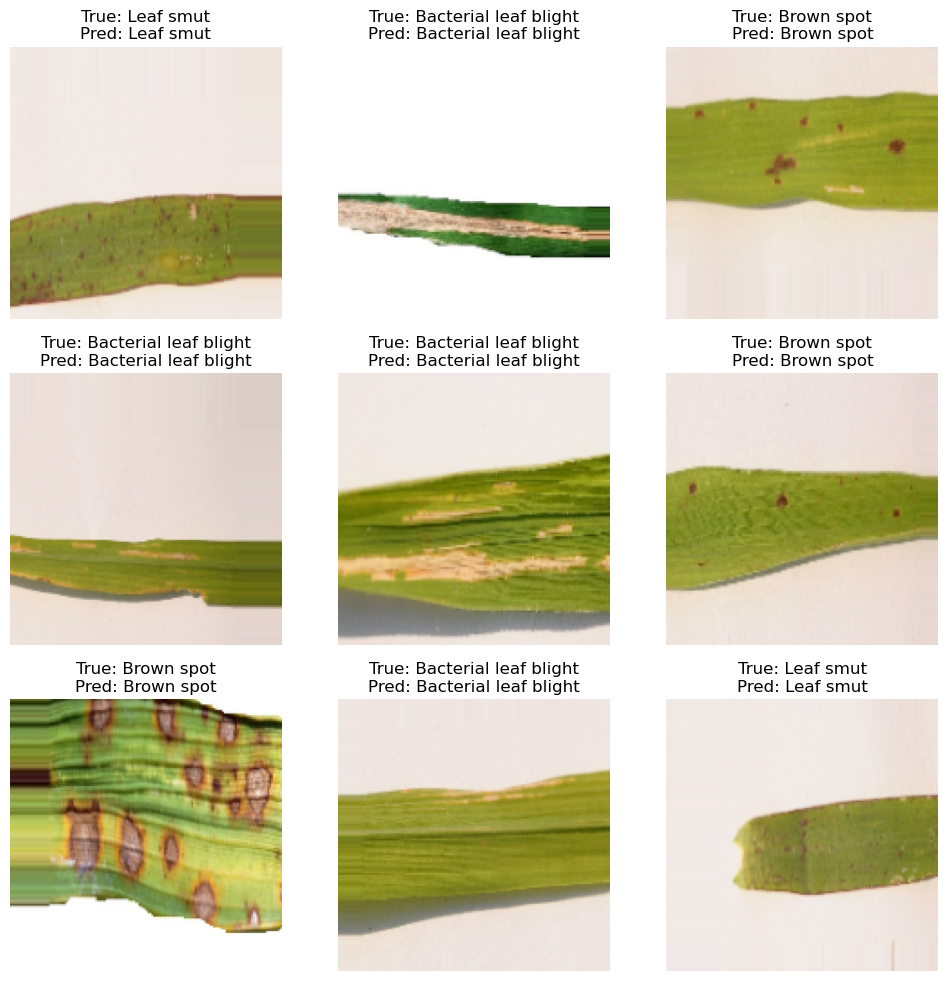

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Get a batch of images from the test set
test_images, test_labels = next(validation_generator)
predictions = model.predict(test_images)

# Convert predictions and labels to human-readable format
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)
class_labels = list(validation_generator.class_indices.keys())

# Plot some test images with their predicted and true labels
def plot_images(images, true_labels, predicted_labels, class_labels):
    plt.figure(figsize=(12, 12))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        plt.title(f"True: {class_labels[true_labels[i]]}\nPred: {class_labels[predicted_labels[i]]}")
        plt.axis('off')
    plt.show()

# Plotting the predictions
plot_images(test_images, true_classes, predicted_classes, class_labels)


## Visulaize the graph :

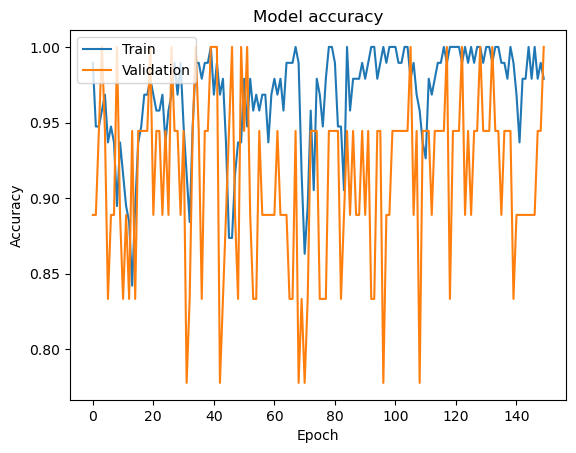

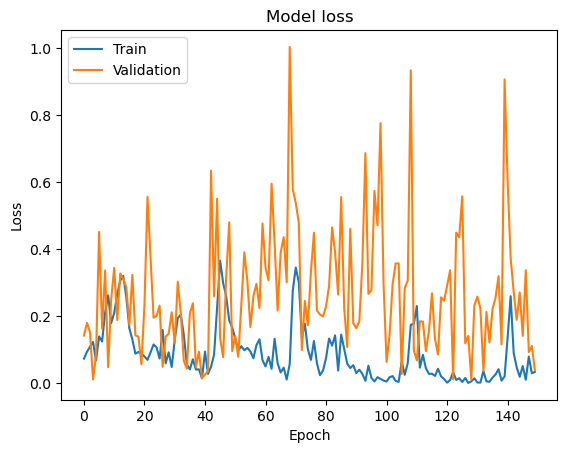

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


## Model Building and Evaluation
#### Preprocessing: Images often require resizing, normalization, and augmentation to enhance model performance.
#### Training: Use of CNNs (Convolutional Neural Networks) for learning features and making predictions based on image data.
#### Validation: Evaluation of model accuracy and generalization using validation data to ensure it performs well on unseen images.

## Conclusion :
*               1.The rice leaf diseases to be evaluate model of accuracy 100% achieved.
*               2.The similar to the predicted of images and actual images. 